In [ ]:
# CNN Method by: Lazy Programmer Inc. -- https://ibmcsr.udemy.com/course/deep-learning-advanced-nlp/learn/lecture/10232922#overview

In [1]:
# !pip install keras
# !pip install tensorflow

In [3]:
import keras
print(keras.__version__)

3.4.1


In [5]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [7]:
# https://deeplearningcourses.com/c/deep-learning-advanced-nlp
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.metrics import roc_auc_score


In [8]:
# some configuration
MAX_SEQUENCE_LENGTH = 150 # Based on internet comments
MAX_VOCAB_SIZE = 20000 # 
EMBEDDING_DIM = 100 # Size of each word vector
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10

In [9]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}

# Path to the GloVe file
glove_file = os.path.join('../../large_files/glove.6B', f'glove.6B.{EMBEDDING_DIM}d.txt')

# Open the GloVe file and read word vectors
with open(glove_file, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec

print(f'Found {len(word2vec)} word vectors.')

Loading word vectors...
Found 400000 word vectors.


In [10]:
# prepare text samples and their labels
print('Loading in comments...')

train = pd.read_csv("train.csv")
sentences = train["comment_text"].fillna("DUMMY_VALUE").values
possible_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
targets = train[possible_labels].values

Loading in comments...


In [16]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [17]:
# convert the sentences (strings) into lists of tokens which are then turned into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
# print("sequences:", sequences); exit()


print("max sequence length:", max(len(s) for s in sequences))
print("min sequence length:", min(len(s) for s in sequences))
s = sorted(len(s) for s in sequences)
print("median sequence length:", s[len(s) // 2])

print("max word index:", max(max(seq) for seq in sequences if len(seq) > 0))

max sequence length: 1400
min sequence length: 0
median sequence length: 35
max word index: 19999


Found 210337 unique tokens.
Shape of data tensor: (159571, 150)
Filling pre-trained embeddings...
Building model...
Training model...
Epoch 1/10


C:\Users\olive\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


998/998 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.9734 - loss: 0.1248 - val_accuracy: 0.9939 - val_loss: 0.0858
Epoch 2/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.9940 - loss: 0.0851 - val_accuracy: 0.9941 - val_loss: 0.0857
Epoch 3/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.9940 - loss: 0.0804 - val_accuracy: 0.9941 - val_loss: 0.0846
Epoch 4/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.9932 - loss: 0.0780 - val_accuracy: 0.9918 - val_loss: 0.0916
Epoch 5/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.9931 - loss: 0.0744 - val_accuracy: 0.9938 - val_loss: 0.1014
Epoch 6/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.9931 - loss: 0.0723 - val_accuracy: 0.9940 - val_loss: 0.0861
Epoch 7/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.9931 - loss: 0.0682 - val_accuracy: 0.9895 - val_loss: 0.0919
Epoch 8/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.9917 - loss: 0.0664 - val_accurac

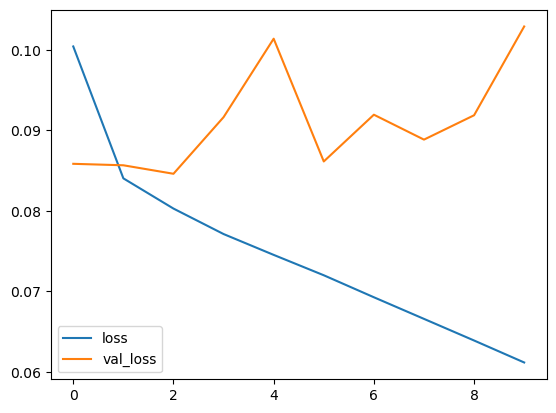

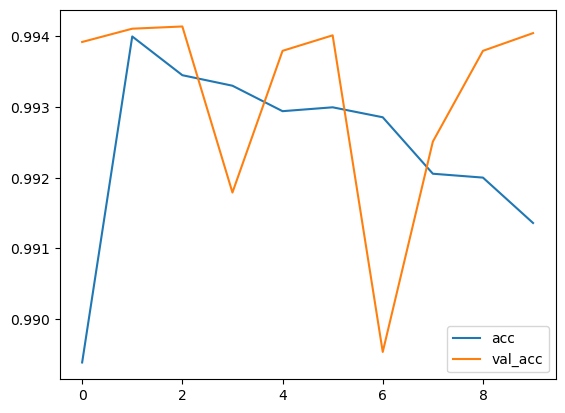

4987/4987 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step
0.9564527695992059


In [18]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

# exit()


# pad sequences so that we get a N x T matrix
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)



# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector



# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)


print('Building model...')

# train a 1D convnet with global maxpooling
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(possible_labels), activation='sigmoid')(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

print('Training model...')
r = model.fit(
  data,
  targets,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)


# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# plot the mean AUC over each label
p = model.predict(data)
aucs = []
for j in range(6):
    auc = roc_auc_score(targets[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))